**Using Machine Learning Algorithms to find the Optimal Clusters**

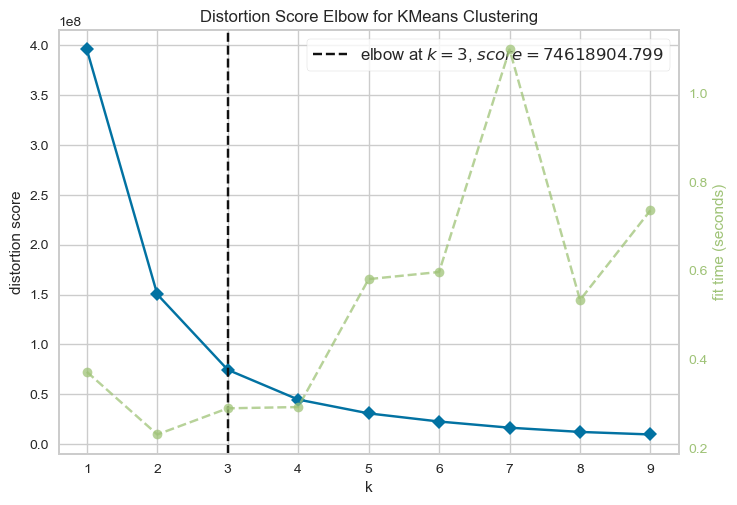

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import warnings

# Read the CSV file from the file path
df = pd.read_csv('/Users/philipacquaye-mensah/Downloads/heatstroke.csv')

# Choose relevant features for clustering
features = ['hrv_mean', 'hrv_entropy']

# Select features
data = df[features]

# Ignore warnings - not required
warnings.filterwarnings("ignore")

# Initialize KMeans model
kmeans = KMeans()

# Use KElbowVisualizer for the elbow method
"""
  k=(1, 10): This specifies the range of values for the number of clusters (k).
  The KElbowVisualizer will evaluate the inertia for k values from 1 to 10.
"""
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(data)
visualizer.show()

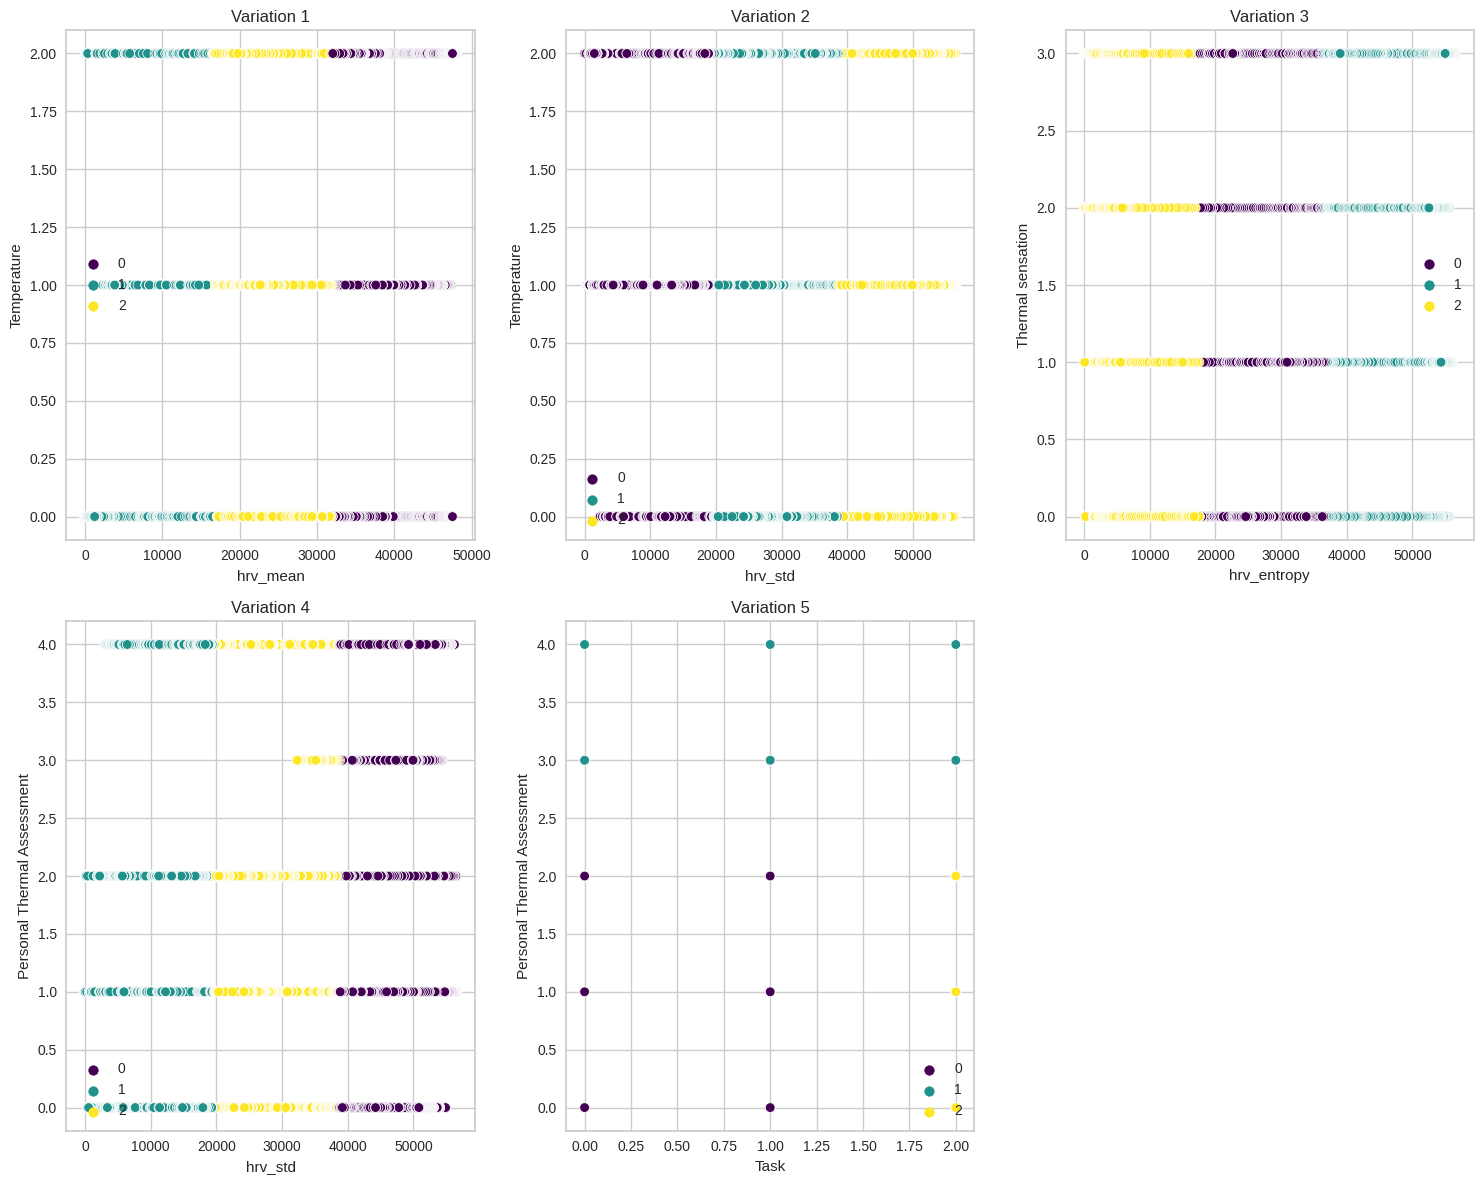

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Define different feature combinations
feature_combinations = [
    ['hrv_mean', 'Temperature'],
    ['hrv_std', 'Temperature'],
    ['hrv_entropy', 'Thermal sensation'],
    ['hrv_std','Personal Thermal Assessment'],
    ['Task', 'Personal Thermal Assessment'],
]


# Create subplots for scatter plots
plt.figure(figsize=(15, 12))

# Iterate through different feature combinations
for i, feature in enumerate(feature_combinations, start=1):
    xx = df[feature].apply(le.fit_transform)

    # Fit KMeans model
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(xx)

    # Plot the scatter plot
    plt.subplot(2, 3, i)
    # palette='viridis' specifies the 'viridis' color palette.
    sns.scatterplot(data=xx, x=feature[0], y=feature[1], hue=kmeans.labels_, palette='viridis')
    # Set Title by for loop number
    plt.title(f'Variation {i}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()